### **Image Processing** Total Red Blood Cells

**with Thresholding**

*By Mohammad Attala Rajafar*

Credit to:    
[Opencv Documentation](https://docs.opencv.org/)

Import libraries

In [1]:
import cv2
import matplotlib.pyplot as plt


Load image

In [2]:
image = cv2.imread(
    'D:\\Work\\Tech\\Data Science\\Python\\Notebook\\Malaria detection\\Total_RBC\\Images\\redbloodcell.png', cv2.COLOR_BGR2RGB)


Grayscale image and blur to focus on Red Blood Cells

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (17, 17), 0.1)


Create Threshold Canny for easier processing

In [4]:
canny = cv2.Canny(blur, 70, 170, 3)


Threshold image widen to make it look sharp and clear

In [5]:
dilated = cv2.dilate(canny, (1,1), iterations=1)

Visualization

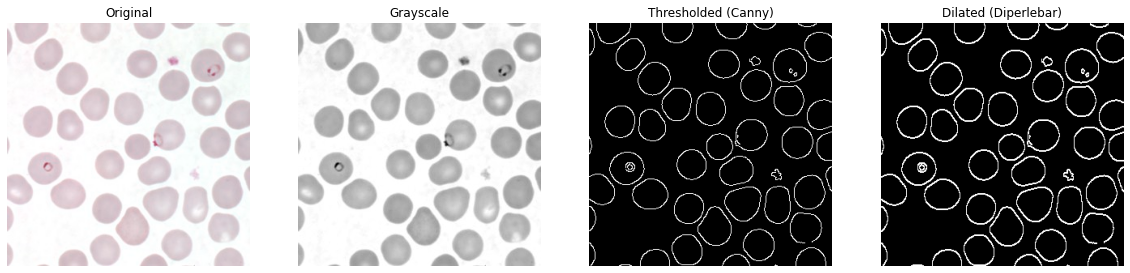

In [6]:
fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
ax = axes.ravel()

ax[0] = plt.subplot(2, 4, 1)
ax[1] = plt.subplot(2, 4, 2)
ax[2] = plt.subplot(2, 4, 3, sharex=ax[0], sharey=ax[0])
ax[3] = plt.subplot(2, 4, 4, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(blur, cmap=plt.cm.gray)
ax[1].set_title('Grayscale')
ax[1].axis('off')

ax[2].imshow(canny, cmap=plt.cm.gray)
ax[2].set_title('Thresholded (Canny)')
ax[2].axis('off')

ax[3].imshow(dilated, cmap=plt.cm.gray)
ax[3].set_title('Dilated (Diperlebar)')
ax[3].axis('off')

plt.show()


Counting the number of Red Blood Cells on Image

In [7]:
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print("The number of red blood cells is", len(cnt),"Sel.")

The number of red blood cells is 46 Sel.


Visualization of Red Blood Cells

(-0.5, 299.5, 299.5, -0.5)

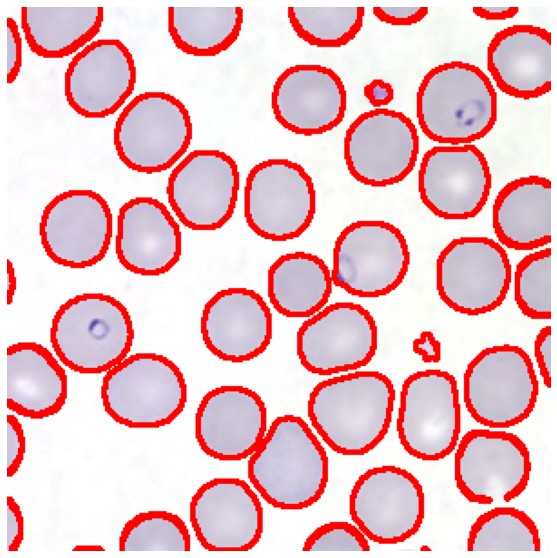

In [8]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (255, 0, 0), 2)
fig, ax = plt.subplots(ncols=1, figsize=(15, 10))
ax.imshow(rgb)
ax.axis("off")


### End